In [1]:
# imports
import os, sys
import re
import ast
import datetime
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import csv 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
import plotly.graph_objs as go
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot


Using TensorFlow backend.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/asheshchoudhury/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#from googlesearch import search
#from google import google as g
#from textblob import TextBlob
#import texttable as tt
from time import sleep

In [4]:
filepath = 'C:/Users/asheshchoudhury/Desktop/Capstone/allArticles.txt'

In [5]:
# Start timer to get total time for running all code
t0 = datetime.datetime.now()
#Train
#df=pd.read_csv("C:/Users/asheshchoudhury/Desktop/Capstone-new/w210-final/data/ExtractedTweets.csv")
#df=pd.read_csv('/home/asheshchoudhury/ExtractedTweets.csv')
#df=pd.read_csv('/home/asheshchoudhury/senate-labeled-v2.csv')
mylist = []

for chunk in  pd.read_csv('/home/asheshchoudhury/senate-labeled-v2.csv', chunksize=20):
    mylist.append(chunk)

df = pd.concat(mylist, axis= 0)
del mylist

#Check all political parties
print('List of Parties before filtering')
df['party'].unique()
#take only D and R
df = df.loc[(df['party'] == 'Republican') | (df['party'] == 'Democratic')]
print('List of Parties after filtering')
df['party'].unique()
#Add statement lenght as 1 or 2 large oulier can cause abort the program
df['statement_length'] = df['statement'].str.len()
df['statement_length'].describe()
#Take 75% and below ALL statement length as a reasonable samle else huge statment lengt will crash the system
statement_lenght_75_percentile = 1881
df = df.loc[(df['statement_length'] <= statement_lenght_75_percentile)]
df['statement_length'].describe()
df['date'].describe()
#input_percentage_date = 0.1
#no_of_input = int(len(df)*input_percentage_date)
#df=df[:no_of_input]
#Sneak peak
#df.head()
len(df)



List of Parties before filtering


array(['Republican', 'Democratic', 'Independent Democrat', 'Independent'],
      dtype=object)

List of Parties after filtering


array(['Republican', 'Democratic'], dtype=object)

count    546549.000000
mean       1922.050253
std        4364.634689
min           3.000000
25%          86.000000
50%         254.000000
75%        1881.000000
max      956247.000000
Name: statement_length, dtype: float64

count    409930.000000
mean        317.863167
std         406.126927
min           3.000000
25%          71.000000
50%         143.000000
75%         376.000000
max        1881.000000
Name: statement_length, dtype: float64

count    4.099300e+05
mean     2.003825e+07
std      6.528506e+04
min      1.995010e+07
25%      1.998073e+07
50%      2.003052e+07
75%      2.008092e+07
max      2.019102e+07
Name: date, dtype: float64

409930

In [6]:
#EDA
df_1995_2001 = df.loc[(df['date'] <= 20010101)]
df_2001_2005 = df.loc[(df['date'] >= 20010101) & (df['date'] <= 20050101)]
df_2005_2009 = df.loc[(df['date'] >= 20050101) & (df['date'] <= 20090101)]
df_2009_2013 = df.loc[(df['date'] >= 20090101) & (df['date'] <= 20130101)]
df_2013_2017 = df.loc[(df['date'] >= 20130101) & (df['date'] <= 20170101)]
df_2017_2019 = df.loc[(df['date'] >= 20170101)]
                           

In [7]:
print('Total no. of statements in original input senate dataset :', len(df))
print('Total no. of Republican statements in original input senate dataset :' ,len(df.loc[(df['party'] == 'Republican')]))
print('Total no. of Democratic statements in original input senate dataset:' ,len(df.loc[(df['party'] == 'Democratic')]))
print('% of Republican statements in original input senate dataset :', "%.2f" %(len(df.loc[(df['party'] == 'Republican')])/len(df)*100))

Total no. of statements in original input senate dataset : 409930
Total no. of Republican statements in original input senate dataset : 208429
Total no. of Democratic statements in original input senate dataset: 201501
% of Republican statements in original input senate dataset : 50.85


In [8]:

no_of_republican_statements = [len(df_1995_2001.loc[(df_1995_2001['party'] == 'Republican')]),len(df_2001_2005.loc[(df_2001_2005['party'] == 'Republican')]),len(df_2005_2009.loc[(df_2005_2009['party'] == 'Republican')]),len(df_2009_2013.loc[(df_2009_2013['party'] == 'Republican')]),len(df_2013_2017.loc[(df_2013_2017['party'] == 'Republican')]),len(df_2017_2019.loc[(df_2017_2019['party'] == 'Republican')])]
no_of_democrat_statements = [len(df_1995_2001.loc[(df_1995_2001['party'] == 'Democratic')]),len(df_2001_2005.loc[(df_2001_2005['party'] == 'Democratic')]),len(df_2005_2009.loc[(df_2005_2009['party'] == 'Democratic')]),len(df_2009_2013.loc[(df_2009_2013['party'] == 'Democratic')]),len(df_2013_2017.loc[(df_2013_2017['party'] == 'Democratic')]),len(df_2017_2019.loc[(df_2017_2019['party'] == 'Democratic')])]

no_of_republican_statements
no_of_democrat_statements



[86548, 40825, 34152, 16873, 17313, 12721]

[64767, 47892, 34719, 31290, 17557, 5306]

<Figure size 1800x720 with 0 Axes>

Text(0, 0.5, 'No. of Statements')

[Text(0, 0, '1995-2001'),
 Text(0, 0, '2001-05'),
 Text(0, 0, '2005-09'),
 Text(0, 0, '2009-13'),
 Text(0, 0, '2013-17'),
 Text(0, 0, '2017-19')]

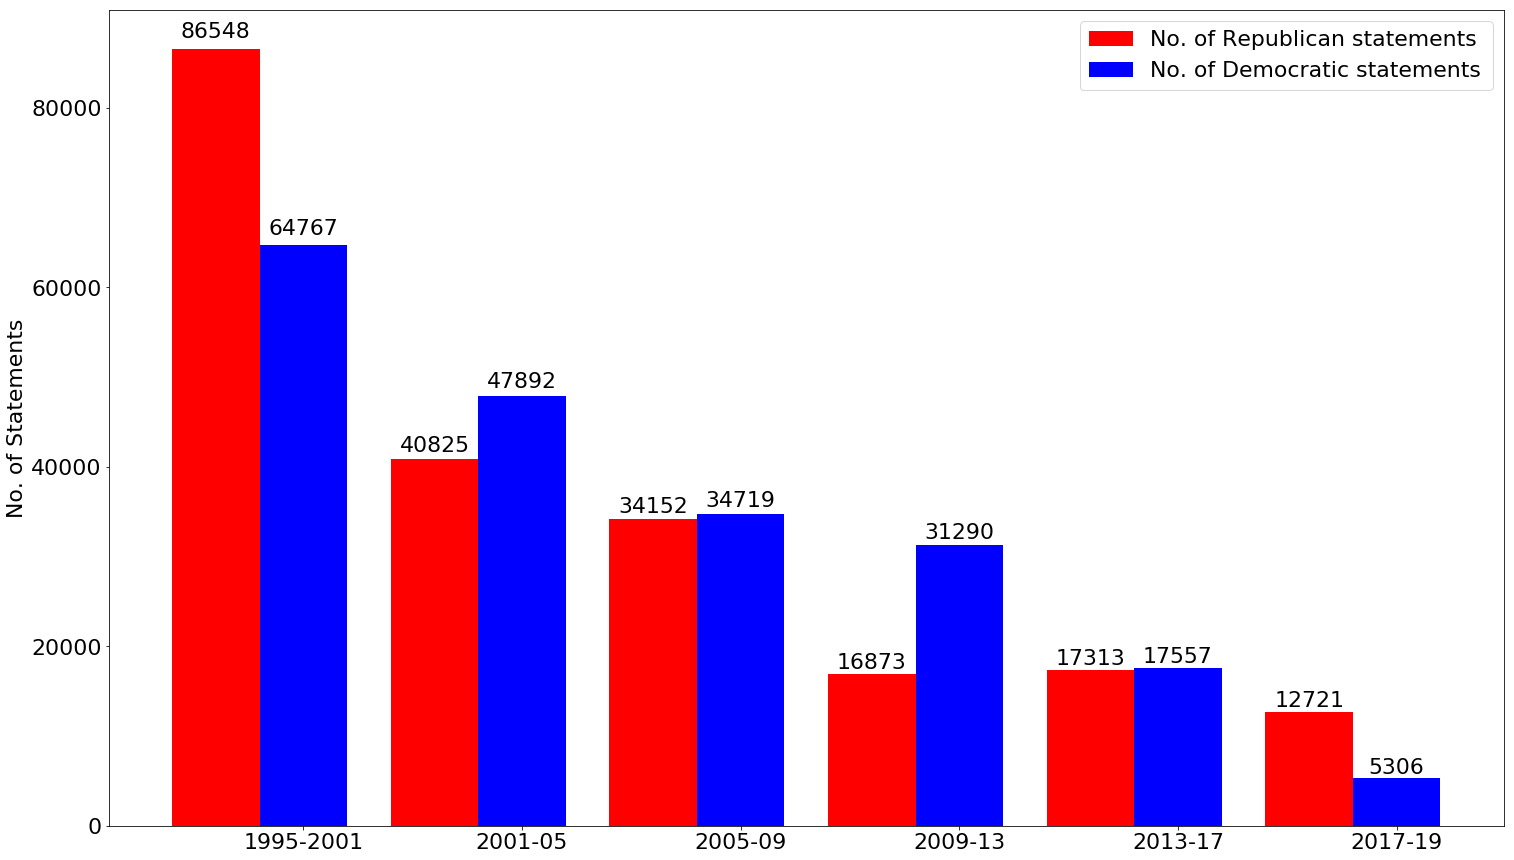

<Figure size 1800x720 with 0 Axes>

In [9]:
N = 6
width = 0.4
ind = np.arange(N)  # the x locations for the groups

fig = plt.figure(figsize = (25, 15))
plt.figure(figsize = (25, 10))
plt.rcParams.update({'font.size': 22})
ax = fig.add_subplot(111)


yvals = no_of_republican_statements
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = no_of_democrat_statements
rects2 = ax.bar(ind+width, zvals, width, color='b')


ax.set_ylabel('No. of Statements')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('1995-2001', '2001-05', '2005-09', '2009-13','2013-17','2017-19') )
ax.legend( (rects1[0], rects2[0]), ('No. of Republican statements ', 'No. of Democratic statements') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2, 1.01*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)


plt.show()

In [10]:
input_data_percentage = 0.1
n = int(len(df)*input_data_percentage/12)

In [11]:
df_1995_2001_R = df_1995_2001.loc[(df_1995_2001['party'] == 'Republican')][:64767]
df_1995_2001_D = df_1995_2001.loc[(df_1995_2001['party'] == 'Democratic')]
df_2001_2005_R = df_2001_2005.loc[(df_2001_2005['party'] == 'Republican')]
df_2001_2005_D = df_2001_2005.loc[(df_2001_2005['party'] == 'Democratic')][:40825]
df_2005_2009_R = df_2005_2009.loc[(df_2005_2009['party'] == 'Republican')]
df_2005_2009_D = df_2005_2009.loc[(df_2005_2009['party'] == 'Democratic')][:34152]
df_2009_2013_R = df_2009_2013.loc[(df_2009_2013['party'] == 'Republican')]
df_2009_2013_D = df_2009_2013.loc[(df_2009_2013['party'] == 'Democratic')][:16873]
df_2013_2017_R = df_2013_2017.loc[(df_2013_2017['party'] == 'Republican')]
df_2013_2017_D = df_2013_2017.loc[(df_2013_2017['party'] == 'Democratic')][:17313]
df_2017_2019_R = df_2017_2019.loc[(df_2017_2019['party'] == 'Republican')][:5306]
df_2017_2019_D = df_2017_2019.loc[(df_2017_2019['party'] == 'Democratic')]

df = pd.concat([df_1995_2001_R[:n],df_1995_2001_D[:n],df_2001_2005_R[:n],df_2001_2005_D[:n],df_2005_2009_R[:n],df_2005_2009_D[:n]])
df = pd.concat([df,df_2009_2013_R[:n],df_2009_2013_D[:n],df_2013_2017_R[:n],df_2013_2017_D[:n],df_2017_2019_R[:n],df_2017_2019_D[:n]])
print('Total no. of statements in balanced input senate dataset :' ,len(df))
print('Total no. of Republican statements in balanced input senate dataset :' ,len(df.loc[(df['party'] == 'Republican')]))
print('Total no. of Democratic statements in balanced input senate dataset:' ,len(df.loc[(df['party'] == 'Democratic')]))
print('% of Republican statements in balanced input senate dataset :', "%.2f" %(len(df.loc[(df['party'] == 'Republican')])/len(df)*100))


Total no. of statements in balanced input senate dataset : 40992
Total no. of Republican statements in balanced input senate dataset : 20496
Total no. of Democratic statements in balanced input senate dataset: 20496
% of Republican statements in balanced input senate dataset : 50.00


In [12]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 10000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['statement'])
word_index = tokenizer.word_index
#len(word_index)
print('Found %s unique tokens.'% len(word_index))
print('Found {} unique tokens.' .format(len(word_index)))
#X = tokenizer.texts_to_sequences(df['Speech text'])
#X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
#print('Shape of data tensor:', X.shape)
df['Party_numeric D=0 R=1'] = np.where(df['party'] =="Democratic", 0, 1)
df.head()

#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
#print(X_train.shape,Y_train.shape)
#print(X_test.shape,Y_test.shape)

Found 27582 unique tokens.
Found 27582 unique tokens.


,date,party,statement,statement_length,Party_numeric D=0 R=1
2,19950104,Republican,Mr. President I send a resolution to the desk....,257,1
5,19950104,Republican,Mr. President I ask unanimous consent that the...,411,1
29,19950104,Republican,Mr. President I have been pleased to listen to...,1094,1
32,19950104,Republican,Reserving the right to object Mr. President. J...,323,1
33,19950104,Republican,And when all time is used or yielded back is t...,139,1


In [13]:
def remove_special_characters(text, remove_digits=False):
    # Remove special characters from text
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [14]:
#import spacy
#nlp = spacy.load('en_core_web_md', parse=True, tag=True, entity=True)


#def lemmatize_text(text):
    # Get base form for word variants (i.e. running ==> run, cats ==> cat, etc.)
#    text = nlp(text)
#    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
#    return text

In [15]:
import nltk
from nltk.tokenize.toktok import ToktokTokenizer

tokenizer1 = ToktokTokenizer()
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)

# Remove words 'no' and 'not' from stopword list as these may change meaning of words/phrases
stopword_list = nltk.corpus.stopwords.words('english')
for word in ['no', 'not', 'he', 'she', 'his', 'her', 'hers']:
    stopword_list.remove(word)

# Add characters not captured in special character removal to stop list
stopword_list += ['[', ']', "\\",'mr','mrs','president']                     

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer1.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [16]:
import unicodedata

clean_text = []

for text in df['statement']:
    # Remove accent characters => Expand Contractions => Remove special characters => Lammatize Text => Remove Stop Words
    no_accent_chars = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #expanded_text = expand_contractions(no_accent_chars)
    expanded_text = no_accent_chars 
    no_special_chars = remove_special_characters(expanded_text, remove_digits=False)
    #lem_text = lemmatize_text(no_special_chars)
    #filtered_text = remove_stopwords(lem_text)
    filtered_text = remove_stopwords(no_special_chars)
    
    # Make all text lowercase
    lowercase_text = filtered_text.lower()
    
    # Split text into list of words
    words = lowercase_text.split()
    clean_text.append(words)

# Add cleaned text to dataframe
df['clean_statement'] = clean_text
df.head()

,date,party,statement,statement_length,Party_numeric D=0 R=1,clean_statement
2,19950104,Republican,Mr. President I send a resolution to the desk....,257,1,"[send, resolution, desk, vice, clerk, report, ..."
5,19950104,Republican,Mr. President I ask unanimous consent that the...,411,1,"[ask, unanimous, consent, text, bill, printed,..."
29,19950104,Republican,Mr. President I have been pleased to listen to...,1094,1,"[pleased, listen, statement, distinguished, se..."
32,19950104,Republican,Reserving the right to object Mr. President. J...,323,1,"[reserving, right, object, clarification, prev..."
33,19950104,Republican,And when all time is used or yielded back is t...,139,1,"[time, used, yielded, back, next, order, busin..."


In [17]:
# Set variables for dependent and independent variables
target = df['Party_numeric D=0 R=1']
data = df['clean_statement'].values

In [18]:
# Create Bigrams as Certain terms may come up that make more sense together than independently 
#import gensim
#from gensim.models import phrases
#from gensim.models.phrases import Phrases

# Identify and create bigrams
#bigrams = phrases.Phrases(data)
#bigrams = data

bigrams_data = []


for i in range(len(data)):
#    bigrams_data.append(bigrams[data[i]])
    bigrams_data.append([data[i]])
    
bigrams_data = np.array(bigrams_data)

# Get word count for longest sample after stop words removed and bigrams created
max_len = 0
for bigram in bigrams_data:
    tumpa = 0
    for bigram1 in bigram:
        for bigram2 in bigram1:
            tumpa = tumpa + 1
        
        max_len = tumpa if tumpa > max_len else max_len
#print(max_len)
 
print('Maximum Sample Word Count: {}' .format(max_len))
#print('Sample:\n' ' '.join([bigram for bigram in bigrams_data[0]]))

Maximum Sample Word Count: 220


In [19]:
# Create variable to hold set of all unique words in sample corpus
#total_vocabulary = set(word for text in bigrams_data for word in text)
total_vocabulary =[]
for bigram in bigrams_data:
    for bigram1 in bigram:
        for bigram2 in bigram1:
            total_vocabulary.append(bigram2)
#len(total_vocabulary)

print('Total Words in Vocabulary:{}' .format(len(total_vocabulary)))

Total Words in Vocabulary:1155235


In [20]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove*.zip
# Create dictionary of vectors from GloVe based on total vocabulary
embeddings_index = {}
word_count = 0
f = open('/home/asheshchoudhury/glove.6B.50d.txt', encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    if word in total_vocabulary:
        if word_count > MAX_NB_WORDS:
            break
        elif word_count <= MAX_NB_WORDS:
            #print(word_count)
            word_count = word_count + 1
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
f.close()

print('Total Words in Embedding Index: {}' .format(len(embeddings_index)))

Total Words in Embedding Index: 10001


In [21]:
class W2vVectorizer(object):
    # Assign GloVe vector to each word in vocabulary, or zero vector to words/bigrams not found
    def __init__(self, w2v):
        # takes in a dictionary of words and vectors as input
        self.w2v = w2v
        if len(w2v) == 0:
            self.dimensions = 0
        else:
            self.dimensions = len(w2v[next(iter(embeddings_index))])
    
    # Following required to allow for implementation of a fit method
    # Cannot be used in SKLearn Pipeline otherwise 
    def fit(self, X, y):
        return self
            
    def transform(self, X):
        return np.array([
            np.mean([self.w2v[w] for w in words if w in self.w2v]
                   or [np.zeros(self.dimensions)], axis=0) for words in X])

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB


rf  = Pipeline([("Word2Vec Vectorizer", W2vVectorizer(embeddings_index)),
                ("Random Forest", RandomForestClassifier(n_estimators=100, verbose=True, n_jobs=-1))])
svc = Pipeline([("Word2Vec Vectorizer", W2vVectorizer(embeddings_index)),
                ('Support Vector Machine', SVC(gamma='scale'))])
#lr  = Pipeline([("Word2Vec Vectorizer", W2vVectorizer(embeddings_index)),
#                ('Logistic Regression', LogisticRegression(n_jobs=-1))])
nb =  Pipeline([("Word2Vec Vectorizer", W2vVectorizer(embeddings_index)),
                ('Naive Bayse', GaussianNB())])

In [23]:
models = [('Random Forest', rf),
          ("Support Vector Machine", svc),
#          ("Logistic Regression", lr)]
          ("Naive Bayes", nb)]


In [24]:
# Use 2 cross-validations to gauge performance
scores = [(name, cross_val_score(model, data, target, cv=2).mean()) for name, model in models]
scores

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


[('Random Forest', 0.45635733801717404),
 ('Support Vector Machine', 0.44884367681498827),
 ('Naive Bayes', 0.462675644028103)]

In [25]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding, GRU
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D, Conv1D, MaxPooling1D, Flatten
from keras.models import Model, Sequential, load_model
from keras.metrics import categorical_crossentropy
from keras.preprocessing import text
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam, RMSprop

In [26]:
# Convert each sample's list of bigrams into a string
bigrams_joined = []

for a in bigrams_data:
    for b in a:
        bigrams_joined.append(' '.join(b))

# Remove underscore from filters and no need to convert to lowercase
tokenizer = text.Tokenizer(filters='!"#%&()*+,./:;<=>?@[\\]^`{|}~\t\n', lower=False)
tokenizer.fit_on_texts(bigrams_joined)
sequences = tokenizer.texts_to_sequences(bigrams_joined)

word_index = tokenizer.word_index
print('Total Words in Vocabulary: {}' .format(len(word_index)))

Total Words in Vocabulary: 33559


In [27]:
X_t = pad_sequences(sequences, maxlen=max_len, padding='post')
X_t_df = pd.DataFrame(X_t)
X_t_df['bigrams'] = bigrams_data
X_t_df['text'] = df.reset_index(drop=True)['clean_statement']
X_t_df.head()

,0,1,2,3,4,5,6,7,8,9,...,212,213,214,215,216,217,218,219,bigrams,text
0,220,61,146,704,184,218,571,188,184,165,...,0,0,0,0,0,0,0,0,"[send, resolution, desk, vice, clerk, report, ...","[send, resolution, desk, vice, clerk, report, ..."
1,2,4,3,257,11,40,27,2,4,3,...,0,0,0,0,0,0,0,0,"[ask, unanimous, consent, text, bill, printed,...","[ask, unanimous, consent, text, bill, printed,..."
2,539,1297,275,121,1,544,2937,581,15,409,...,0,0,0,0,0,0,0,0,"[pleased, listen, statement, distinguished, se...","[pleased, listen, statement, distinguished, se..."
3,394,53,135,1865,209,1594,179,9,179,104,...,0,0,0,0,0,0,0,0,"[reserving, right, object, clarification, prev...","[reserving, right, object, clarification, prev..."
4,9,318,1202,80,151,12,30,275,1,696,...,0,0,0,0,0,0,0,0,"[time, used, yielded, back, next, order, busin...","[time, used, yielded, back, next, order, busin..."


In [28]:
# Set target variable
y = pd.get_dummies(target).values

In [29]:
#Train Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_t_df, y, test_size=.5)

X_train_text = X_train[['text', 'bigrams']]
X_train = X_train[X_train.columns[:-2]]

X_test_text = X_test[['text', 'bigrams']]
X_test = X_test[X_test.columns[:-2]]


In [30]:
# Create matrix of random vectors which matches size of the word index
embedding_matrix = np.random.random((len(word_index) + 1, 50))
for word, i in word_index.items():
    
    # For each word found in the embedding index, assign the known vector
    embedding_vector = embeddings_index.get(word)
    
    # Otherwise, keep the randomly assigned vector
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
embedding_layer = Embedding(len(word_index) + 1, 
                            100, weights = [embedding_matrix], 
                            input_length = max_len, trainable=True)

In [31]:
# Start from Network Development Strategy Synopsis

In [32]:
#CNN

#def create_cnn_model(cdim=128, ksize=5, pool1=5, pool2=35, density=128, lr=.001, epochs=100, batch_size=128, validation_split=.3, patience=5, verbose=0):
def create_cnn_model(cdim=128, ksize=5, pool1=5, pool2=35, density=128, lr=.001, epochs=1, batch_size=128, validation_split=.2, patience=5, verbose=0):
    
    # Start Timer
    start = datetime.datetime.now()
    #print('inside the loop-1')
    
    # Display Hyperparameter Settings
    print('Convolution Dimensions\tWindow Size\tPool 1\t\tPool 2\t\tDensity')
    print(cdim,ksize,pool1,pool2,density, sep ='\t\t\t')
    

    
    # Build Model
    input_ = Input(shape=(max_len,), dtype='int32')
    embedded_sequences = embedding_layer(input_)
    #print('inside the loop-2')
    
    x = Conv1D(cdim, ksize, activation='relu')(embedded_sequences)
    x = MaxPooling1D(pool1, padding='same')(x)
    x = Conv1D(cdim, ksize, activation='relu')(x)
    x = MaxPooling1D(pool1, padding='same')(x)
    x = Conv1D(cdim, ksize, activation='relu')(x)
    x = MaxPooling1D(pool2, padding='same')(x)
    x = Flatten()(x)
    x = Dense(density, activation='relu')(x)
    #x = Dense(num_classes, activation='softmax')(x)
    x = Dense(2, activation='softmax')(x)
    #print('inside the loop-3')
    model = Model(inputs=input_, outputs=x)
    #print('inside the loop-4')
    
    # Compile Model
    history = model.compile(loss='categorical_crossentropy', 
                            optimizer=Adam(lr=lr), 
                            metrics=['accuracy'])
    #print('inside the loop-5')
    # Create Checkpoints & Stopping Parameters
    #checkpoints_path = f'models/cnn_best_{p1}_{p2}.hdf5'
    #checkpoints_path = f'models/cnn_best_.hdf5'

    #checkpoint = ModelCheckpoint(checkpoints_path, 
    #                             monitor='val_loss', 
    #                             verbose=verbose, 
    #                             save_best_only=True, 
    #                             mode='min')

    #early_stopping = EarlyStopping(monitor='val_loss', 
    #                               mode='min', 
    #                               patience=patience)
    
    #callbacks = [checkpoint, early_stopping]
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001)]
    #print('inside the loop-6')
    
    # Fit Model
    history = model.fit(X_train, y_train, 
                        epochs=epochs, 
                        batch_size=batch_size, 
                        validation_split=validation_split, 
                        callbacks=callbacks, 
                        verbose=verbose)
    #print('inside the loop-7')
    # Evaluate Model
    results = model.evaluate(X_test, y_test)
    #print(results)
    # End Timer
    end = datetime.datetime.now()
    time_taken = end - start
    # Display Results
    print('Time to Complete:', time_taken)
    #print(f'Loss:\t{results[0]:.2f}\tAccuracy:\t{results[1]:.4f}\n')
    #print('Loss:\t' results[0]:.2f 'Accuracy:\t' results[1]:.4f)
    #print('Loss:{0.2f}\t' .format(results[0]), 'Accuracy:{0.4f}\t' .format(results[1]))
    #print('Printing Loss')
    print('Loss:' ,"%.2f" %(results[0]))
    #print('Printing Accuracy')
    print('Accuracy:',"%.2f" %(results[1]))



    return model, history, results, time_taken


In [33]:
# Display total time elapsed since program started
t1 = datetime.datetime.now()
print('Time Elapsed: {}' .format(t1 - t0))

# Hyperparameter grid
#cdims = [8, 16]
#ksizes = [3, 5, 7]
#pools1 = [3, 5, 7]
#pools2 = [5, 10]
#densities = [4, 8]
# Hyperparameter grid
cdims = [256,512]
ksizes = [2,3]
pools1 = [1, 2]
pools2 = [20,40]
densities = [4,16]


# Create dictionary for tracking CNN results and hyperparameters
cnn_results = {'Convolution Dimensions': [], 
               'Window Size': [], 
               'Pool 1': [], 
               'Pool 2': [], 
               'Density': [], 
               'Time': [], 
               'Loss': [], 
               'Accuracy': []}

for cdim in cdims:
    for ksize in ksizes:
        for pool1 in pools1:
            for pool2 in pools2:
                for density in densities:
                    
                    try:
                        #print('Before calling cnn')
                        cnn_model, cnn_history, cnn_eval, cnn_time = create_cnn_model(cdim=cdim, 
                                                                                      ksize=ksize, 
                                                                                      pool1=pool1, 
                                                                                      pool2=pool2, 
                                                                                      density=density)
                        #print('After calling cnn')
                        cnn_results['Convolution Dimensions'].append(cdim)
                        cnn_results['Window Size'].append(ksize)
                        cnn_results['Pool 1'].append(pool1)
                        cnn_results['Pool 2'].append(pool2)
                        cnn_results['Density'].append(density)
                        cnn_results['Loss'].append(cnn_eval[0])
                        cnn_results['Accuracy'].append(cnn_eval[1])
                        print(cnn_time)
                        cnn_results['Time'].append(cnn_time)
                        #print('CNN results should follow')
                        #print(cnn_results)
                    except:
                        # If invalid hyperparameters, pass
                        #print('?')
                        pass
                    
t2 = datetime.datetime.now()
print('Time Elapsed:{}\t' .format(t2 - t0))
print('Time to Find Best Model:{}\t' .format(t2 - t1))

Time Elapsed: 0:05:03.824190
Convolution Dimensions	Window Size	Pool 1		Pool 2		Density
256			2			1			20			4
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Convolution Dimensions	Window Size	Pool 1		Pool 2		Density
256			2			1			20			16


20496/20496 [==============================] - 22s 1ms/step
Time to Complete: 0:01:19.878929
Loss: 0.66
Accuracy: 0.58
0:01:19.878929
Convolution Dimensions	Window Size	Pool 1		Pool 2		Density
256			2			1			40			4
20496/20496 [==============================] - 20s 994us/step
Time to Complete: 0:01:14.163831
Loss: 0.66
Accuracy: 0.58
0:01:14.163831
Convolution Dimensions	Window Size	Pool 1		Pool 2		Density
256			2			1			40			16
20496/20496 [==============================] - 20s 991us/step
Time to Complete: 0:01:14.976733
Loss: 0.64
Accuracy: 0.61
0:01:14.976733
Convolution Dimensions	Window Size	Pool 1		Pool 2		Density
256			2			2			20			4
20496/20496 [==============================] - 13s 643us/step
Time to Complete: 

In [34]:
# Train Best CNN Model
# Create dataframe from results dictionary
cnn_results_df = pd.DataFrame.from_dict(cnn_results)

# Get row values associated with highest accuracy
best_cnn_model = cnn_results_df[cnn_results_df['Accuracy'] == cnn_results_df['Accuracy'].max()]

# Save hyperparameters to variables
cdim = best_cnn_model['Convolution Dimensions'].values[0]
ksize = int(best_cnn_model['Window Size'].values[0])
pool1 = int(best_cnn_model['Pool 1'].values[0])
pool2 = int(best_cnn_model['Pool 2'].values[0])
density = int(best_cnn_model['Density'].values[0])

# Rebuild & retrain model with 
cnn_model, cnn_history, cnn_eval, cnn_time = create_cnn_model(cdim=cdim, 
                                                              ksize=ksize, 
                                                              pool1=pool1, 
                                                              pool2=pool2, 
                                                              density=density,
                                                              lr=.001, 
                                                              epochs=100, 
                                                              patience=20, 
                                                              verbose=1)

t3 = datetime.datetime.now()
print('Time Elapsed:', (t3 - t0))
print('Time to Train Best Model:', (t3 - t2))


Convolution Dimensions	Window Size	Pool 1		Pool 2		Density
256			2			2			40			4
Train on 16396 samples, validate on 4100 samples
Epoch 1/100
16396/16396 [==============================] - 33s 2ms/step - loss: 0.3260 - accuracy: 0.8101 - val_loss: 1.2288 - val_accuracy: 0.6200
Epoch 2/100
16396/16396 [==============================] - 31s 2ms/step - loss: 0.2836 - accuracy: 0.8313 - val_loss: 1.6954 - val_accuracy: 0.6105
Epoch 3/100
16396/16396 [==============================] - 31s 2ms/step - loss: 0.2728 - accuracy: 0.8352 - val_loss: 1.3996 - val_accuracy: 0.6215
Epoch 4/100
16396/16396 [==============================] - 31s 2ms/step - loss: 0.2683 - accuracy: 0.8377 - val_loss: 1.5359 - val_accuracy: 0.6224
Epoch 5/100
16396/16396 [==============================] - 30s 2ms/step - loss: 0.2570 - accuracy: 0.8412 - val_loss: 1.7217 - val_accuracy: 0.6168
Epoch 6/100
20496/20496 [==============================] - 15s 743us/step
Time to Complete: 0:03:26.573536
Loss: 2.22
Accuracy: 0.6

In [35]:
from tensorflow.core.protobuf import rewriter_config_pb2

config_proto = tf.ConfigProto(log_device_placement=False, allow_soft_placement=True)

off = rewriter_config_pb2.RewriterConfig.OFF

config_proto.graph_options.rewrite_options.arithmetic_optimization = off

session = tf.Session(config=config_proto)




In [36]:
# RNN
#def create_rnn_model(rnn_type='gru', units=50, drop=.5, density=50, lr=.001, epochs=100, batch_size=128, validation_split=.3, patience=5, verbose=0):
def create_rnn_model(rnn_type='gru', units=50, drop=.5, density=50, lr=.001, epochs=1, batch_size=128, validation_split=.2, patience=20, verbose=0):
    
    # Start Timer
    start = datetime.datetime.now()
    
    
    # Display Hyperparameter Settings
    model_type = 'GRU' if rnn_type == 'gru' else 'LSTM'
    print('Model Type\tUnits\tDropout Rate\tDensity')
    print(rnn_type,units,drop,density, sep ='\t\t\t')
    
    
#    tf.logging.set_verbosity(tf.logging.ERROR)
    
    
    # Build Model
    input_ = Input(shape=(max_len,), dtype='int32')
    embedded_sequences = embedding_layer(input_)
    
    if rnn_type == 'gru':
        x = Bidirectional(GRU(units, return_sequences=True))(embedded_sequences)
    else:
        x = Bidirectional(LSTM(units, return_sequences=True))(embedded_sequences)
        
    x = GlobalMaxPool1D()(x)
    x = Dropout(drop)(x)
    x = Dense(density, activation='relu')(x)
    x = Dropout(drop)(x)
    #x = Dense(num_classes, activation='softmax')(x)
    x = Dense(2, activation='softmax')(x)
    
    model = Model(inputs=input_, outputs=x)
    
    
    # Compile Model
    model.compile(loss='categorical_crossentropy', 
                  optimizer=Adam(lr=lr), 
                  metrics=['accuracy'])
    
    
    # Create Checkpoints & Stopping Parameters
    #checkpoints_path = f'models/rnn_best_{p1}_{p2}.hdf5'
#    checkpoints_path = f'models/rnn_best_.hdf'
#    checkpoint = ModelCheckpoint(checkpoints_path, 
#                                 monitor='val_loss', 
#                                 verbose=verbose, 
#                                 save_best_only=True, 
#                                 mode='min')
    
#    early_stopping = EarlyStopping(monitor='val_loss', 
#                                   mode='min', 
#                                   patience=patience)
    
#    callbacks = [checkpoint, early_stopping]
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001)]
    
    
    # Fit Model
    history = model.fit(X_train, y_train, 
                        epochs=epochs, 
                        batch_size=batch_size, 
                        validation_split=validation_split, 
                        callbacks=callbacks, 
                        verbose=verbose)
    
    # Evaluate Model
    results = model.evaluate(X_test, y_test)
    
    # End Timer
    end = datetime.datetime.now()
    
    # Display Results
    print('Time to Complete:', end - start)
    print('Loss:' ,"%.2f" %(results[0]))
    print('Accuracy:' , "%.2f" %(results[1]))
    
    return model, history, results, end-start


In [37]:
#RNN grid search
rnn_types = ['lstm', 'gru']
units = [25, 50]
drops = [.25, 1]
densities = [100, 150]

#units = [5, 10]
#drops = [.25, .5]
#densities = [10, 15]

rnn_results = {'Model Type': [], 'Units': [], 'Dropout Rate': [], 'Density': [], 'Time': [], 'Loss': [], 'Accuracy': []}

for rnn_type in rnn_types:
    for unit in units:
        for drop in drops:
            for density in densities:
                rnn_model, rnn_history, rnn_eval, rnn_time = create_rnn_model(rnn_type=rnn_type, 
                                                                              units=unit, 
                                                                              drop=drop, 
                                                                              density=density)
                rnn_results['Model Type'].append(rnn_type)
                rnn_results['Units'].append(unit)
                rnn_results['Dropout Rate'].append(drop)
                rnn_results['Density'].append(density)
                rnn_results['Loss'].append(rnn_eval[0])
                rnn_results['Accuracy'].append(rnn_eval[1])
                rnn_results['Time'].append(rnn_time)
                #print('RNN results should follow')
                #print(rnn_results)
                
t4 = datetime.datetime.now()
print('Time Elapsed:', (t4 - t0))
print('Time to Find Best Model:', (t4 - t3))

Model Type	Units	Dropout Rate	Density
lstm			25			0.25			100
20496/20496 [==============================] - 50s 2ms/step
Time to Complete: 0:02:55.143623
Loss: 0.91
Accuracy: 0.62
Model Type	Units	Dropout Rate	Density
lstm			25			0.25			150
20496/20496 [==============================] - 53s 3ms/step
Time to Complete: 0:03:02.641757
Loss: 0.96
Accuracy: 0.62
Model Type	Units	Dropout Rate	Density
lstm			25			1			100
20496/20496 [==============================] - 52s 3ms/step
Time to Complete: 0:02:53.723216
Loss: 0.90
Accuracy: 0.62
Model Type	Units	Dropout Rate	Density
lstm			25			1			150
20496/20496 [==============================] - 51s 2ms/step
Time to Complete: 0:03:00.173409
Loss: 0.91
Accuracy: 0.62
Model Type	Units	Dropout Rate	Density
lstm			50			0.25			100
20496/20496 [==============================] - 68s 3ms/step
Time to Complete: 0:03:45.238239
Loss: 1.05
Accuracy: 0.62
Model Type	Units	Dropout Rate	Density
lstm			50			0.25			150
20496/20496 [==============================] 

In [38]:
#Train best RNN model 
rnn_results_df = pd.DataFrame.from_dict(rnn_results)

best_rnn_model = rnn_results_df[rnn_results_df['Accuracy'] == rnn_results_df['Accuracy'].max()]

rnn_type = best_rnn_model['Model Type'].values[0]
units = int(best_rnn_model['Units'].values[0])
drop = float(best_rnn_model['Dropout Rate'].values[0])
density = int(best_rnn_model['Density'].values[0])

rnn_model, rnn_history, rnn_eval, rnn_time = create_rnn_model(rnn_type=rnn_type, 
                                                              units=units, 
                                                              drop=drop, 
                                                              density=density, 
                                                              lr=.001, 
                                                              epochs=100, 
                                                              patience=20, 
                                                              verbose=1)

t5 = datetime.datetime.now()
print('Time Elapsed:', (t5 - t0))
#print('Time to Train Best Model:', (t5 - t4))

Model Type	Units	Dropout Rate	Density
gru			50			0.25			100
Train on 16396 samples, validate on 4100 samples
Epoch 1/100
16396/16396 [==============================] - 191s 12ms/step - loss: 0.3646 - accuracy: 0.8017 - val_loss: 1.1036 - val_accuracy: 0.6285
Epoch 2/100
16396/16396 [==============================] - 188s 11ms/step - loss: 0.3003 - accuracy: 0.8229 - val_loss: 1.2750 - val_accuracy: 0.6190
Epoch 3/100
16396/16396 [==============================] - 191s 12ms/step - loss: 0.2902 - accuracy: 0.8256 - val_loss: 1.3486 - val_accuracy: 0.6283
Epoch 4/100
16396/16396 [==============================] - 188s 11ms/step - loss: 0.2788 - accuracy: 0.8316 - val_loss: 1.5252 - val_accuracy: 0.6234
Epoch 5/100
16396/16396 [==============================] - 186s 11ms/step - loss: 0.2738 - accuracy: 0.8377 - val_loss: 1.6159 - val_accuracy: 0.6285
Epoch 6/100
20496/20496 [==============================] - 71s 3ms/step
Time to Complete: 0:20:22.142227
Loss: 1.78
Accuracy: 0.63
Time Elaps

<Figure size 1080x720 with 0 Axes>

<BarContainer object of 3 artists>

Text(Benchmark:Naive Bayes, 0.48267564402810303, '46.27%')

Text(CNN, 0.6323145818710327, '61.23%')

Text(RNN, 0.6459757876396179, '62.60%')

Text(0, 0.5, 'Accuracy')

(0, 1)

([<matplotlib.axis.YTick at 0x7f4b64bfd198>,
 <a list of 6 Text yticklabel objects>)

Text(0.5, 1.0, 'Top Scores')

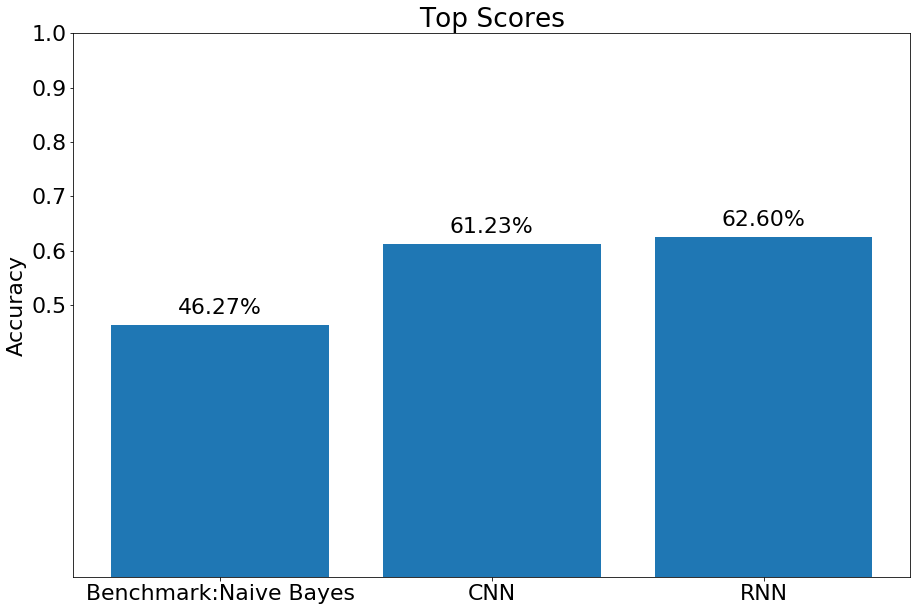

In [39]:
#Visualize results
from operator import itemgetter
best_benchmark = 'Benchmark:' + max(scores,key=itemgetter(1))[0]

labels = [best_benchmark, 'CNN', 'RNN']
acc = [max(scores,key=itemgetter(1))[1], cnn_eval[1], rnn_eval[1]]

plt.figure(figsize = (15, 10))
plt.bar(labels, acc)
for i in range(3):
    plt.text(labels[i], acc[i] + .02, ("%.2f" %(acc[i]*100)) +'%', ha='center')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.yticks([i/10 for i in range(5, 11)], [i*10/100 for i in range(5, 11)])
plt.title('Top Scores')
plt.show()

In [40]:
# Inspect Top model performance 
top_models = {'rnn': rnn_model, 'cnn': cnn_model}
histories = {'rnn_hist': rnn_history, 'cnn_hist': cnn_history}
best = 'c' if cnn_eval[1] > rnn_eval[1] else 'r'
best_model = top_models[best+'nn']
best_model_hist = histories[best + 'nn_hist']
print('Top Model Type:' ,best.upper()+'NN')
best_model.summary()

Top Model Type: RNN
Model: "model_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_50 (InputLayer)        (None, 220)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 220, 100)          3356000   
_________________________________________________________________
bidirectional_17 (Bidirectio (None, 220, 100)          45300     
_________________________________________________________________
global_max_pooling1d_17 (Glo (None, 100)               0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_34 (Dropout)         (None, 10

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'RNN Model Accuracy')

Text(0, 0.5, 'RNN Accuracy')

Text(0.5, 0, 'Epoch')

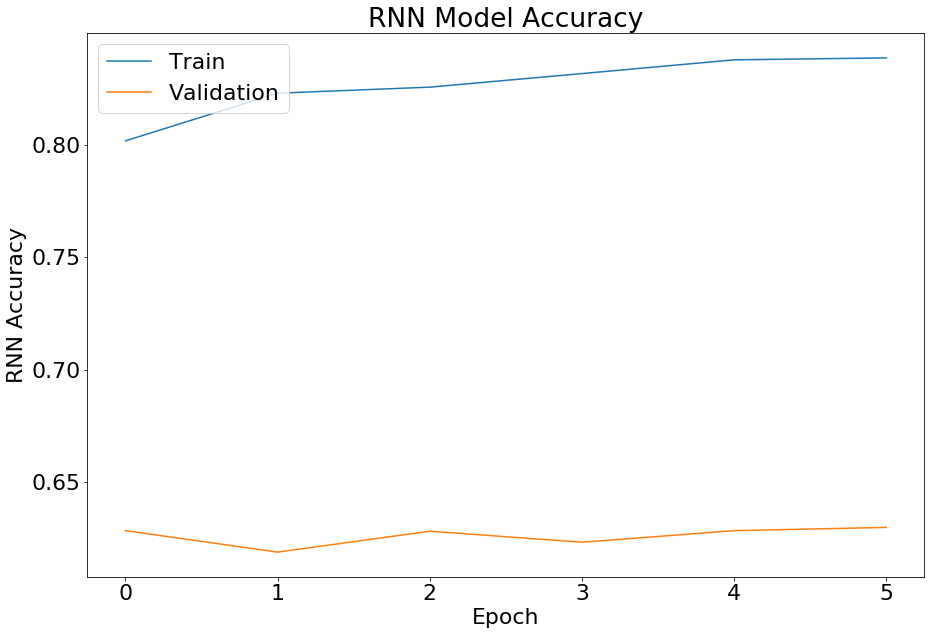

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'RNN Model Loss / Error')

Text(0, 0.5, 'RNN Loss / Error')

Text(0.5, 0, 'Epoch')

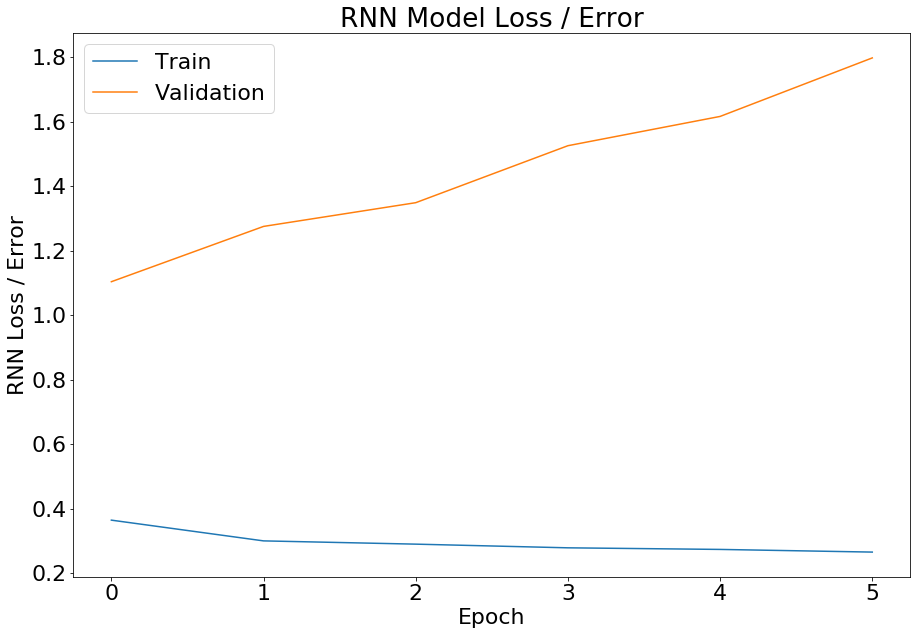

In [41]:
#Results history
# Display history for accuracy
plt.figure(figsize=(15, 10))
plt.plot(best_model_hist.history['accuracy'])
plt.plot(best_model_hist.history['val_accuracy'])
plt.title(best.upper()+'NN Model Accuracy')
plt.ylabel(best.upper() + 'NN Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Display history for loss
plt.figure(figsize=(15, 10))
plt.plot(best_model_hist.history['loss'])
plt.plot(best_model_hist.history['val_loss'])
plt.title(best.upper() + 'NN Model Loss / Error')
plt.ylabel(best.upper() + 'NN Loss / Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [42]:
#Confusion matrix and prediction
from sklearn.metrics import confusion_matrix, f1_score
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "blue")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
F1 Score: 60.44


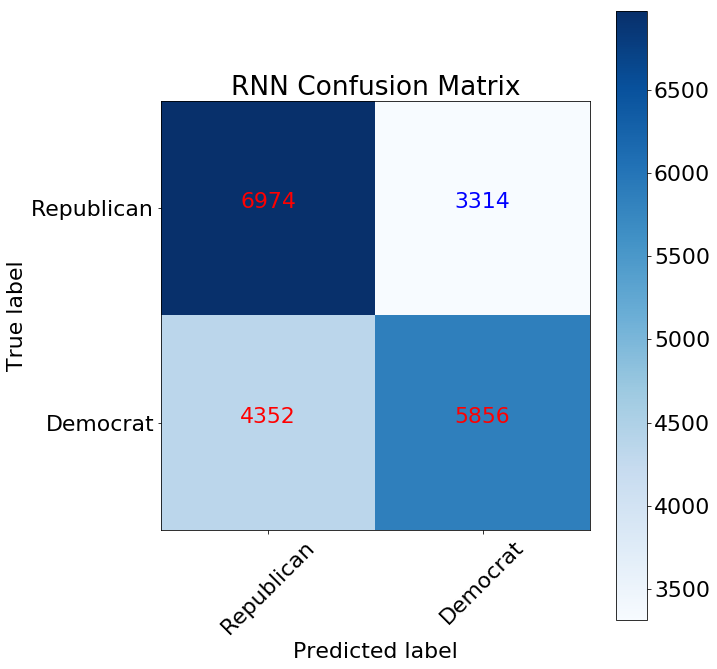

In [43]:
preds = np.argmax(best_model.predict(X_test), axis=1)
actual = np.argmax(y_test, axis=1)

cm = confusion_matrix(actual, preds)

#[1,0] = 0;[0,1] =1
#check y and target to confirm this
#(1,0) = Democrat
#(0,1) = Republican
#p1 = Repub. P2 = Democ

cm_plot_labels = ['Republican','Democrat']

plot_confusion_matrix(cm, cm_plot_labels, normalize=False, title=best.title() +'NN Confusion Matrix')

print('F1 Score: ' "%.2f" %(f1_score(actual, preds)*100))

In [44]:
# Save all predictions to dataframe
preds_df = pd.DataFrame.from_dict({'Predictions': preds, 'Actual': actual})
preds_df = preds_df.join(X_test_text.reset_index(drop=True))

# Create column to indicate if the prediction matches the actual
# 0 = Clinton; 1 = Trump
preds_df['Accuracy'] = preds_df['Predictions'] == preds_df['Actual']
preds_df.head()

,Actual,Predictions,text,bigrams,Accuracy
0,1,1,"[suggest, voice, vote, amendment]","[suggest, voice, vote, amendment]",True
1,0,0,"[reinforcing, truth]","[reinforcing, truth]",True
2,1,1,"[`, `, treasurers, relief, act]","[`, `, treasurers, relief, act]",True
3,0,0,"[thank, leader]","[thank, leader]",True
4,1,0,"[ask, unanimous, consent, order, quorum, call,...","[ask, unanimous, consent, order, quorum, call,...",False


In [45]:
df1=pd.read_csv('/home/asheshchoudhury/articles1.csv')
df2=pd.read_csv('/home/asheshchoudhury/articles2.csv')
df3=pd.read_csv('/home/asheshchoudhury/articles3.csv')
allarticles_df = pd.concat([df1,df2,df3])
allarticles_df.head(5)
len(allarticles_df)


,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


142570

In [46]:
# Take selected number of records to test
no_of_records = 142570


In [47]:
test_df = allarticles_df[['title','publication','date','month','year','content']].head(no_of_records)

In [48]:

clean_text = []
i = 0

for text in test_df['content']:
    i = i + 1
    # Remove accent characters => Expand Contractions => Remove special characters => Lammatize Text => Remove Stop Words
    no_accent_chars = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #expanded_text = expand_contractions(no_accent_chars)
    expanded_text = no_accent_chars 
    no_special_chars = remove_special_characters(expanded_text, remove_digits=False)
    #lem_text = lemmatize_text(no_special_chars)
    #filtered_text = remove_stopwords(lem_text)
    filtered_text = remove_stopwords(no_special_chars)
    
    # Make all text lowercase
    lowercase_text = filtered_text.lower()
    
    # Split text into list of words
    words = lowercase_text.split()
    clean_text.append(words)
    if (i%10000 == 0):
        print('Currently processing: %s of total %s records' %(i,no_of_records))

# Add cleaned text to dataframe
test_df['clean_content'] = clean_text


Currently processing: 10000 of total 142570 records
Currently processing: 20000 of total 142570 records
Currently processing: 30000 of total 142570 records
Currently processing: 40000 of total 142570 records
Currently processing: 50000 of total 142570 records
Currently processing: 60000 of total 142570 records
Currently processing: 70000 of total 142570 records
Currently processing: 80000 of total 142570 records
Currently processing: 90000 of total 142570 records
Currently processing: 100000 of total 142570 records
Currently processing: 110000 of total 142570 records
Currently processing: 120000 of total 142570 records
Currently processing: 130000 of total 142570 records
Currently processing: 140000 of total 142570 records


In [49]:
data = test_df['clean_content'].values
bigrams_data = []


for i in range(len(data)):
#    bigrams_data.append(bigrams[data[i]])
    bigrams_data.append([data[i]])
    
bigrams_data = np.array(bigrams_data)


In [50]:
bigrams_joined = []

for a in bigrams_data:
    for b in a:
        bigrams_joined.append(' '.join(b))

# Remove underscore from filters and no need to convert to lowercase
#tokenizer = text.Tokenizer(filters='!"#%&()*+,./:;<=>?@[\\]^`{|}~\t\n', lower=False)
tokenizer.fit_on_texts(bigrams_joined)
sequences = tokenizer.texts_to_sequences(bigrams_joined)

word_index = tokenizer.word_index
print('Total Words in Vocabulary: {}' .format(len(word_index)))

Total Words in Vocabulary: 345508


In [51]:
X_t = pad_sequences(sequences, maxlen=max_len, padding='post')
X_t_df = pd.DataFrame(X_t)
#X_t_df['bigrams'] = bigrams_data
#X_t_df['text'] = df.reset_index(drop=True)['clean_tweet']
len(X_t_df)

142570

In [52]:
X_t_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,210,211,212,213,214,215,216,217,218,219
142565,14912,83,108,58,1986,224,71,3205,1,16,...,1279,25560,819,532,83,188,57,28,881,382
142566,2652,582,6776,2983,12151,1464,232,1763,1553,4,...,205801,56732,1151,139,2710,96308,205802,860,470,94
142567,218,311,880,5712,36307,4592,8932,7678,4,2517,...,5712,36307,2,20272,18109,15764,553,5423,217,18683
142568,4234,4759,3257,122,12999,463,29597,1445,475,3762,...,513,664,637,161,812,3194,5062,387,24,139
142569,8614,2498,783,1718,1510,72156,2464,1636,13660,149,...,13,5,52,1853,10,2498,118,1421,1428,2739


In [53]:
a = X_t_df.shape[0]
b = X_t_df.shape[1]

In [54]:
best_model.summary()

Model: "model_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_50 (InputLayer)        (None, 220)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 220, 100)          3356000   
_________________________________________________________________
bidirectional_17 (Bidirectio (None, 220, 100)          45300     
_________________________________________________________________
global_max_pooling1d_17 (Glo (None, 100)               0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_34 (Dropout)         (None, 100)               0  

In [55]:
#Print the lenght of embedding length
embed_len = (best_model.get_weights()[0]).shape[0]

In [56]:
#Ensure the maximun embedding lenght of training set retains in test set.
X_t_df = np.where(X_t_df >= embed_len, embed_len-1, X_t_df) 

In [57]:
#Predict Political Afflication
political_affliation_pred_D0_R1 = np.argmax(rnn_model.predict(X_t_df), axis=1)
political_affliation_pred_D0_R1

array([0, 0, 0, ..., 1, 0, 0])

In [58]:
# Predict Political leaning (proxy of Bias)
political_affliation_measure=rnn_model.predict(X_t_df)

In [59]:
#Append Political Leaning in DF
democrat_affliation = []
republican_affliation = []
for i in range(len(X_t_df)):
    democrat_affliation.append(political_affliation_measure[i][0])
    republican_affliation.append(political_affliation_measure[i][1])   

In [60]:
test_df['political_affliation_pred_D0_R1'] = political_affliation_pred_D0_R1
test_df['democrat_affliation'] = democrat_affliation
test_df['republican_affliation'] = republican_affliation


In [61]:
test_df.loc[(test_df['republican_affliation'] > 0.30) & (test_df['republican_affliation'] < 0.70)].head(4)
test_df['political_affliation_pred_D0_R1'].describe()

,title,publication,date,month,year,content,clean_content,political_affliation_pred_D0_R1,democrat_affliation,republican_affliation
8,"First, a Mixtape. Then a Romance. - The New Yo...",New York Times,2016-12-31,12.0,2016.0,"Just how is Hillary Kerr, the founder of ...","[hillary, kerr, founder, digital, media, compa...",0,0.649083,0.350917
30,Tips for Your Post-Holiday Clutter Purge - The...,New York Times,2017-04-11,4.0,2017.0,With the year winding down and New Year’s reso...,"[year, winding, new, years, resolutions, aroun...",0,0.675454,0.324546
48,Megyn Kelly’s Jump to NBC From Fox News Will T...,New York Times,2017-01-05,1.0,2017.0,"For Megyn Kelly, the shift from Fox News to NB...","[megyn, kelly, shift, fox, news, nbc, she, hos...",1,0.468297,0.531703
59,"In Republicans’ Ethics Office Gambit, a Specta...",New York Times,2017-01-05,1.0,2017.0,WASHINGTON — Majorities in Congress often o...,"[washington, majorities, congress, often, over...",0,0.562474,0.437526


count    142570.000000
mean          0.459697
std           0.498375
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: political_affliation_pred_D0_R1, dtype: float64

In [62]:
publications = test_df['publication'].unique()

In [63]:
Republican_affliation =[]
publicatation_house = []
Republican_1_or_Democrat_0_classification =[]

for i in publications:
    publicatation_house.append(i)
    Republican_affliation.append("%.1f" %(test_df.loc[test_df['publication'] == i]['republican_affliation'].mean()*100))
    Republican_1_or_Democrat_0_classification.append("%.1f" %(test_df.loc[test_df['publication'] == i]['political_affliation_pred_D0_R1'].mean()*100))
    #"%.2f" %(f1_score(actual, preds)*100))
    #print("%.1f" %(test_df.loc[test_df['publication'] == i]['republican_affliation'].mean()*100))

In [64]:
publicatation_house

['New York Times',
 'Breitbart',
 'CNN',
 'Business Insider',
 'Atlantic',
 'Fox News',
 'Talking Points Memo',
 'Buzzfeed News',
 'National Review',
 'New York Post',
 'Guardian',
 'NPR',
 'Reuters',
 'Vox',
 'Washington Post']

In [65]:
#Divide Publishing houses
Breitbart_df = test_df.loc[test_df['publication'] == 'Breitbart']
CNN_df = test_df.loc[test_df['publication'] == 'CNN']
Fox_df = test_df.loc[test_df['publication'] == 'Fox News']
Washington_Post_df = test_df.loc[test_df['publication'] == 'Washington Post']
NYT_df = test_df.loc[test_df['publication'] == 'New York Times']
NYT_republican_affliation_df = NYT_df['republican_affliation']
NYT_df.head(2)

,title,publication,date,month,year,content,clean_content,political_affliation_pred_D0_R1,democrat_affliation,republican_affliation
0,House Republicans Fret About Winning Their Hea...,New York Times,2016-12-31,12.0,2016.0,WASHINGTON — Congressional Republicans have...,"[washington, congressional, republicans, new, ...",0,0.912569,8.743095e-02
1,Rift Between Officers and Residents as Killing...,New York Times,2017-06-19,6.0,2017.0,"After the bullet shells get counted, the blood...","[bullet, shells, get, counted, blood, dries, v...",0,1.000000,4.278178e-07


In [66]:
Repub_affl_between_0_and_10= len(NYT_df.loc[(NYT_df['republican_affliation'] > 0) & (NYT_df['republican_affliation'] < 0.1)])
Repub_affl_between_10_and_20=len(NYT_df.loc[(NYT_df['republican_affliation'] > .1) & (NYT_df['republican_affliation'] < 0.2)])
Repub_affl_between_20_and_30=len(NYT_df.loc[(NYT_df['republican_affliation'] > .2) & (NYT_df['republican_affliation'] < 0.3)])
Repub_affl_between_30_and_40=len(NYT_df.loc[(NYT_df['republican_affliation'] > .3) & (NYT_df['republican_affliation'] < 0.4)])
Repub_affl_between_40_and_50=len(NYT_df.loc[(NYT_df['republican_affliation'] > .4) & (NYT_df['republican_affliation'] < 0.5)])
Repub_affl_between_50_and_60=len(NYT_df.loc[(NYT_df['republican_affliation'] > .5) & (NYT_df['republican_affliation'] < 0.6)])
Repub_affl_between_60_and_70=len(NYT_df.loc[(NYT_df['republican_affliation'] > .6) & (NYT_df['republican_affliation'] < 0.7)])
Repub_affl_between_70_and_80=len(NYT_df.loc[(NYT_df['republican_affliation'] > .7) & (NYT_df['republican_affliation'] < 0.8)])
Repub_affl_between_80_and_90=len(NYT_df.loc[(NYT_df['republican_affliation'] > .8) & (NYT_df['republican_affliation'] < 0.9)])
Repub_affl_between_90_and_100=len(NYT_df.loc[(NYT_df['republican_affliation'] > .9) & (NYT_df['republican_affliation'] < 1.0)])

In [67]:
Repub_affl_between_0_and_10
Repub_affl_between_10_and_20
Repub_affl_between_20_and_30
Repub_affl_between_30_and_40
Repub_affl_between_40_and_50
Repub_affl_between_50_and_60
Repub_affl_between_60_and_70
Repub_affl_between_70_and_80
Repub_affl_between_80_and_90
Repub_affl_between_90_and_100

3352

285

220

172

157

152

137

207

263

2792

<Figure size 1080x360 with 0 Axes>

Text(3353, 0.1, '3352')

Text(286, 1.1, '285')

Text(221, 2.1, '220')

Text(173, 3.1, '172')

Text(158, 4.1, '157')

Text(153, 5.1, '152')

Text(138, 6.1, '137')

Text(208, 7.1, '207')

Text(264, 8.1, '263')

Text(2793, 9.1, '2792')

<BarContainer object of 10 artists>

Text(0.5, 0, 'No. of NYT articles')

Text(0, 0.5, 'Republican affliciation scores')

Text(0.5, 1.0, 'No. of NYT articles in each Republican affiliation(D0,R1) score range')

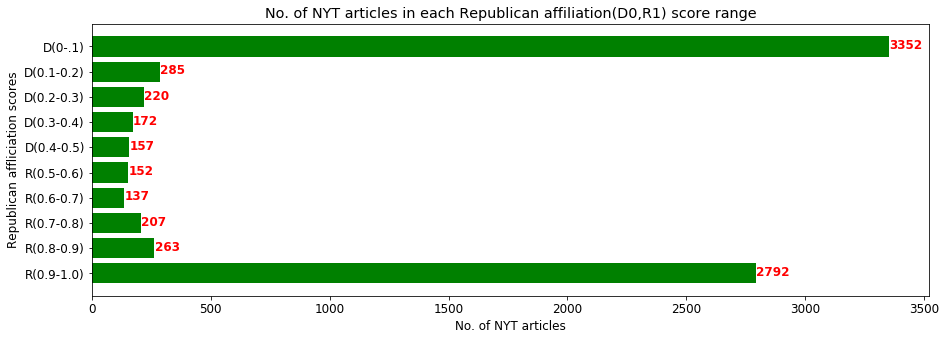

<Figure size 1080x360 with 0 Axes>

In [108]:
Republican_affln = [Repub_affl_between_0_and_10,Repub_affl_between_10_and_20,Repub_affl_between_20_and_30,Repub_affl_between_30_and_40,Repub_affl_between_40_and_50,Repub_affl_between_50_and_60,Repub_affl_between_60_and_70,Repub_affl_between_70_and_80,Repub_affl_between_80_and_90,Repub_affl_between_90_and_100]
Political_affln = ['D(0-.1)','D(0.1-0.2)','D(0.2-0.3)','D(0.3-0.4)','D(0.4-0.5)','R(0.5-0.6)','R(0.6-0.7)','R(0.7-0.8)','R(0.8-0.9)','R(0.9-1.0)']

#N = 10
#width = 0.1
#ind = np.arange(N)  # the x locations for the groups

fig = plt.figure(figsize = (15, 5))
plt.figure(figsize = (15, 5))
plt.rcParams.update({'font.size': 12})
ax = fig.add_subplot(111)

for i, v in enumerate(Republican_affln):
    ax.text(v + 1, i + 0.1, str(v), color='red', fontweight='bold')

ax.barh(Political_affln, Republican_affln, align='center',color = 'green')
ax.set_yticks(Political_affln)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('No. of NYT articles')
ax.set_ylabel('Republican affliciation scores')
ax.set_title('No. of NYT articles in each Republican affiliation(D0,R1) score range')

plt.show()

<Figure size 1080x360 with 0 Axes>

Text(835, 0.1, '834')

Text(760, 1.1, '759')

<BarContainer object of 2 artists>

Text(0.5, 0, 'No. of NYT articles')

Text(0, 0.5, 'Republican affliciation scores')

Text(0.5, 1.0, 'Democrat vs. Republican NYT articles in (0.1,0.9) score range')

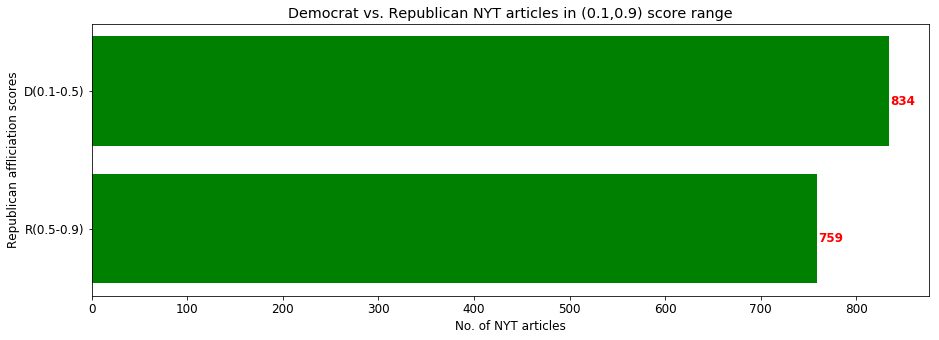

<Figure size 1080x360 with 0 Axes>

In [109]:
Republican_affln = [Repub_affl_between_10_and_20 + Repub_affl_between_20_and_30 + Repub_affl_between_30_and_40 + Repub_affl_between_40_and_50,Repub_affl_between_50_and_60 + Repub_affl_between_60_and_70 + Repub_affl_between_70_and_80 + Repub_affl_between_80_and_90]
Political_affln = ['D(0.1-0.5)','R(0.5-0.9)']

#N = 10
#width = 0.1
#ind = np.arange(N)  # the x locations for the groups

fig = plt.figure(figsize = (15, 5))
plt.figure(figsize = (15, 5))
plt.rcParams.update({'font.size': 12})
ax = fig.add_subplot(111)

for i, v in enumerate(Republican_affln):
    ax.text(v + 1, i + 0.1, str(v), color='red', fontweight='bold')

ax.barh(Political_affln, Republican_affln, align='center',color = 'green')
ax.set_yticks(Political_affln)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('No. of NYT articles')
ax.set_ylabel('Republican affliciation scores')
ax.set_title('Democrat vs. Republican NYT articles in (0.1,0.9) score range')

plt.show()

In [104]:
LL = 0.3
UL = 0.7
Breitbart_Republican_share = Breitbart_df.loc[(Breitbart_df['republican_affliation'] > LL) & (Breitbart_df['republican_affliation'] < UL)]['republican_affliation'].median()
CNN_Republican_share = CNN_df.loc[(CNN_df['republican_affliation'] > LL) & (CNN_df['republican_affliation'] < UL)]['republican_affliation'].median()
Fox_Republican_share = Fox_df.loc[(Fox_df['republican_affliation'] > LL) & (Fox_df['republican_affliation'] < UL)]['republican_affliation'].median()
Washington_Post_Republican_share = Washington_Post_df.loc[(Washington_Post_df['republican_affliation'] > LL) & (Washington_Post_df['republican_affliation'] < UL)]['republican_affliation'].median()
NYT_Republican_share = NYT_df.loc[(NYT_df['republican_affliation'] > LL) & (NYT_df['republican_affliation'] < UL)]['republican_affliation'].median()


In [105]:
Breitbart_Republican_share = round(Breitbart_Republican_share*100,1)
CNN_Republican_share = round(CNN_Republican_share*100,1)
Fox_Republican_share = round(Fox_Republican_share*100,1)
Washington_Post_Republican_share = round(Washington_Post_Republican_share*100,1)
NYT_Republican_share = round(NYT_Republican_share*100,1)


<Figure size 864x432 with 0 Axes>

Text(50.900000000000006, 0.2, '50.7')

Text(49.0, 1.2, '48.8')

Text(48.7, 2.2, '48.5')

Text(49.900000000000006, 3.2, '49.7')

Text(49.900000000000006, 4.2, '49.7')

<BarContainer object of 5 artists>

Text(0.5, 0, 'Republican affiliation score')

Text(0.5, 1.0, 'Republican affiliation in balanced articles (score range :0.3-0.7) across publishers')

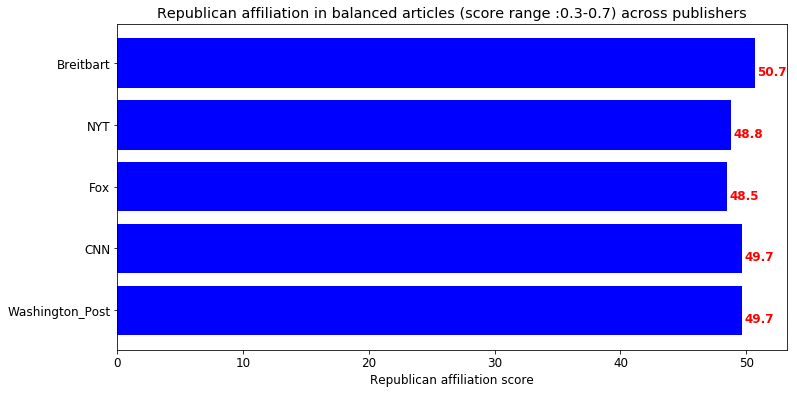

<Figure size 864x432 with 0 Axes>

In [106]:
Republican_share = [Breitbart_Republican_share,NYT_Republican_share,Fox_Republican_share,CNN_Republican_share,Washington_Post_Republican_share]
Publishing_house = ['Breitbart','NYT','Fox','CNN','Washington_Post']

#N = 5
#width = 0.1
#ind = np.arange(N)  # the x locations for the groups

fig = plt.figure(figsize = (12, 6))
plt.figure(figsize = (12, 6))
plt.rcParams.update({'font.size': 12})
ax = fig.add_subplot(111)

for i, v in enumerate(Republican_share):
    ax.text(v + 0.2, i + .2, str(v), color='red', fontweight='bold')

ax.barh(Publishing_house, Republican_share, align='center',color = 'blue')
ax.set_yticks(Publishing_house)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Republican affiliation score')
ax.set_title('Republican affiliation in balanced articles (score range :0.3-0.7) across publishers')

plt.show()


In [72]:
path_to_file = '/home/asheshchoudhury/outputfile.csv'
export_csv = NYT_df.to_csv (path_to_file, index = None, header=True) 


In [73]:
NYT_all_coloumn_df = NYT_df
NYT_df['datetime'] = pd.to_datetime(NYT_df['date'])
NYT_df = NYT_df.set_index('datetime')
NYT_df.drop(['title','publication','date','month','year','content','clean_content','political_affliation_pred_D0_R1','democrat_affliation'], axis=1, inplace=True)
NYT_df.head()

,republican_affliation
datetime,
2016-12-31,8.743095e-02
2017-06-19,4.278178e-07
2017-01-06,3.010485e-03
2017-04-10,2.797949e-05
2017-01-02,5.707177e-03


In [74]:
#Take monthly mean of Republican afflition
NYT_monthlymean_df = NYT_df.resample('M').mean()
NYT_monthlymean_df.head()

,republican_affliation
datetime,
2014-05-31,0.903777
2014-06-30,NaN
2014-07-31,NaN
2014-08-31,NaN
2014-09-30,NaN


In [75]:
NYT_monthlymean_df['Date'] = NYT_monthlymean_df.index.date
NYT_monthlymean_df['Year'] = NYT_monthlymean_df.index.year
NYT_monthlymean_df['Month'] = NYT_monthlymean_df.index.month
NYT_monthlymean_df['Day'] = NYT_monthlymean_df.index.day
NYT_monthlymean_df['Weekday']= NYT_monthlymean_df.index.weekday_name
NYT_monthlymean_df['Year_Month']= NYT_monthlymean_df.Year.astype(str) + '-'+ NYT_monthlymean_df.Month.astype(str)  
NYT_monthlymean_df['NYT_republican_affliation'] = NYT_monthlymean_df['republican_affliation']
NYT_monthlymean_df.drop(['Date','Year','Month','Day','Weekday','republican_affliation'], axis=1, inplace=True)
NYT_monthlymean_df.tail()

,Year_Month,NYT_republican_affliation
datetime,,
2017-02-28,2017-2,0.453621
2017-03-31,2017-3,0.459944
2017-04-30,2017-4,0.476107
2017-05-31,2017-5,0.502551
2017-06-30,2017-6,0.391078


<Figure size 720x360 with 0 Axes>

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



Text(0.5, 1.0, 'Average Republican Affliation trend')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'NYT monthly mean Republican Affliation')

<Figure size 720x360 with 0 Axes>

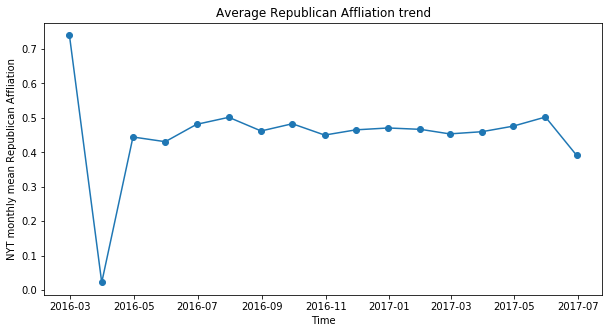

In [76]:
start = '2016'
end = '2018'
fig = plt.figure(figsize = (10, 5))
plt.figure(figsize = (10, 5))
plt.rcParams.update({'font.size': 10})

plt.plot(NYT_monthlymean_df.loc[start:end, 'NYT_republican_affliation'], marker='o', linestyle='-')
plt.title('Average Republican Affliation trend')
plt.xlabel('Time', fontsize=10)
plt.ylabel('NYT monthly mean Republican Affliation', fontsize=10)

#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))



In [77]:
CNN_df['datetime'] = pd.to_datetime(CNN_df['date'])
CNN_df = CNN_df.set_index('datetime')
CNN_df.drop(['title','publication','date','year','month','content','clean_content','political_affliation_pred_D0_R1','democrat_affliation'], axis=1, inplace=True)
CNN_monthlymean_df = CNN_df.resample('M').mean()
CNN_monthlymean_df['Year_Month'] = CNN_monthlymean_df.index.year.astype(str) + '-'+ CNN_monthlymean_df.index.month.astype(str)
CNN_monthlymean_df['CNN_republican_affliation'] = CNN_monthlymean_df['republican_affliation']  
CNN_monthlymean_df.drop(['republican_affliation'], axis=1, inplace=True)
CNN_monthlymean_df.tail()


,Year_Month,CNN_republican_affliation
datetime,,
2017-02-28,2017-2,0.516141
2017-03-31,2017-3,0.503509
2017-04-30,2017-4,0.498816
2017-05-31,2017-5,0.469251
2017-06-30,2017-6,0.505800


In [78]:
Breitbart_df['datetime'] = pd.to_datetime(Breitbart_df['date'])
Breitbart_df = Breitbart_df.set_index('datetime')
Breitbart_df.drop(['title','publication','date','year','month','content','clean_content','political_affliation_pred_D0_R1','democrat_affliation'], axis=1, inplace=True)
Breitbart_monthlymean_df = Breitbart_df.resample('M').mean()
Breitbart_monthlymean_df['Year_Month'] = Breitbart_monthlymean_df.index.year.astype(str) + '-'+ Breitbart_monthlymean_df.index.month.astype(str)
Breitbart_monthlymean_df['Breitbart_republican_affliation'] = Breitbart_monthlymean_df['republican_affliation']  
Breitbart_monthlymean_df.drop(['republican_affliation'], axis=1, inplace=True)
Breitbart_monthlymean_df.tail()


,Year_Month,Breitbart_republican_affliation
datetime,,
2017-02-28,2017-2,0.524582
2017-03-31,2017-3,0.484721
2017-04-30,2017-4,0.492027
2017-05-31,2017-5,0.513879
2017-06-30,2017-6,0.467367


In [79]:
Fox_df['datetime'] = pd.to_datetime(Fox_df['date'])
Fox_df = Fox_df.set_index('datetime')
Fox_df.drop(['title','publication','date','year','month','content','clean_content','political_affliation_pred_D0_R1','democrat_affliation'], axis=1, inplace=True)
Fox_monthlymean_df = Fox_df.resample('M').mean()
Fox_monthlymean_df['Year_Month'] = Fox_monthlymean_df.index.year.astype(str) + '-'+ Fox_monthlymean_df.index.month.astype(str)
Fox_monthlymean_df['Fox_republican_affliation'] = Fox_monthlymean_df['republican_affliation']  
Fox_monthlymean_df.drop(['republican_affliation'], axis=1, inplace=True)
Fox_monthlymean_df.tail()


,Year_Month,Fox_republican_affliation
datetime,,
2016-08-31,2016-8,0.415315
2016-09-30,2016-9,0.420108
2016-10-31,2016-10,0.449203
2016-11-30,2016-11,0.478792
2016-12-31,2016-12,0.472484


In [80]:
Washington_Post_df['datetime'] = pd.to_datetime(Washington_Post_df['date'])
Washington_Post_df = Washington_Post_df.set_index('datetime')
Washington_Post_df.drop(['title','publication','date','year','month','content','clean_content','political_affliation_pred_D0_R1','democrat_affliation'], axis=1, inplace=True)
Washington_Post_monthlymean_df = Washington_Post_df.resample('M').mean()
Washington_Post_monthlymean_df['Year_Month'] = Washington_Post_monthlymean_df.index.year.astype(str) + '-'+ Washington_Post_monthlymean_df.index.month.astype(str)
Washington_Post_monthlymean_df['Washington_Post_republican_affliation'] = Washington_Post_monthlymean_df['republican_affliation']  
Washington_Post_monthlymean_df.drop(['republican_affliation'], axis=1, inplace=True)
Washington_Post_monthlymean_df.tail()


,Year_Month,Washington_Post_republican_affliation
datetime,,
2017-03-31,2017-3,0.467325
2017-04-30,2017-4,0.465894
2017-05-31,2017-5,0.490286
2017-06-30,2017-6,0.492118
2017-07-31,2017-7,0.449642


In [81]:
d1_df  = pd.merge(NYT_monthlymean_df, CNN_monthlymean_df, on='Year_Month', how='outer')
d2_df = pd.merge(Washington_Post_monthlymean_df,d1_df, on='Year_Month', how='outer')
d3_df = pd.merge(Breitbart_monthlymean_df,d2_df, on='Year_Month', how='outer')
News_monthlymean_df = pd.merge(Fox_monthlymean_df,d3_df, on='Year_Month', how='outer')
News_monthlymean_df['datetime'] = pd.to_datetime(News_monthlymean_df['Year_Month'])
News_monthlymean_df = News_monthlymean_df.set_index('datetime')

In [82]:
News_monthlymean_df.head()

,Year_Month,Fox_republican_affliation,Breitbart_republican_affliation,Washington_Post_republican_affliation,NYT_republican_affliation,CNN_republican_affliation
datetime,,,,,,
2004-06-01,2004-6,0.994073,NaN,NaN,NaN,NaN
2004-07-01,2004-7,NaN,NaN,NaN,NaN,NaN
2004-08-01,2004-8,NaN,NaN,NaN,NaN,NaN
2004-09-01,2004-9,NaN,NaN,NaN,NaN,NaN
2004-10-01,2004-10,NaN,NaN,NaN,NaN,NaN


<Figure size 720x360 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'NYT monthly mean Republican Affliation')

<Figure size 720x360 with 0 Axes>

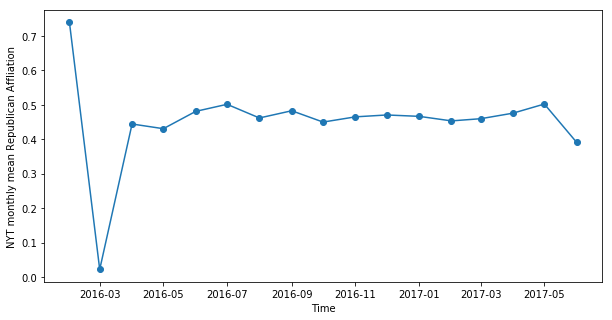

In [83]:
fig = plt.figure(figsize = (10, 5))
plt.figure(figsize = (10, 5))
plt.rcParams.update({'font.size': 10})
ax = plt
ax.plot(News_monthlymean_df.loc['2016-01':'2017-08', 'NYT_republican_affliation'], marker='o', linestyle='-')
plt.xlabel('Time', fontsize=10)
plt.ylabel('NYT monthly mean Republican Affliation', fontsize=10)



<Figure size 720x360 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Monthly mean Republican Affliation across different media publishers')

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

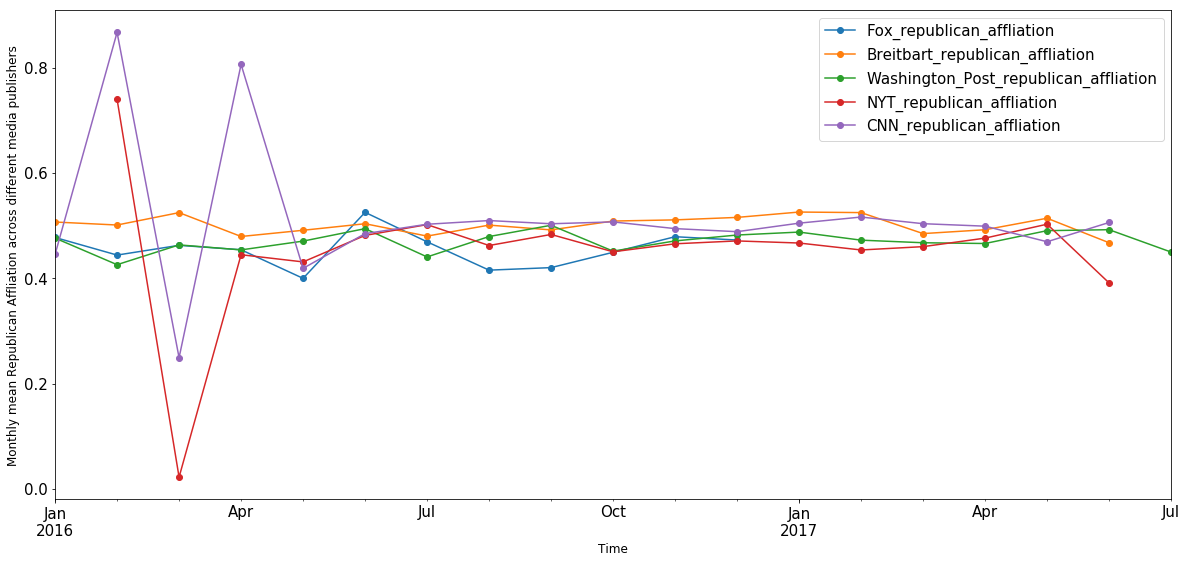

In [84]:
fig = plt.figure(figsize = (10, 5))
plt.figure(figsize = (10, 5))
plt.rcParams.update({'font.size': 15})
cols_plot = ['Fox_republican_affliation', 'Breitbart_republican_affliation', 'Washington_Post_republican_affliation','NYT_republican_affliation','CNN_republican_affliation']
axes = News_monthlymean_df.loc['2016':'2018'][cols_plot].plot(marker='o', linestyle='-', figsize=(20, 9), subplots=False)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Monthly mean Republican Affliation across different media publishers', fontsize=12)



<Figure size 1440x720 with 0 Axes>

,republican_affliation,Date,Year,Month,Day,Weekday,Year_Month
datetime,,,,,,,
2017-06-15,0.024568,2017-06-15,2017,6,15,Thursday,2017-6
2017-06-16,0.863130,2017-06-16,2017,6,16,Friday,2017-6
2017-06-17,NaN,2017-06-17,2017,6,17,Saturday,2017-6
2017-06-18,NaN,2017-06-18,2017,6,18,Sunday,2017-6
2017-06-19,0.334028,2017-06-19,2017,6,19,Monday,2017-6


Text(0.5, 1.0, 'Range of Monthly Republican Affliations in NYT')

Text(0, 0.5, 'Monthly Republican Affliations in NYT ')

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

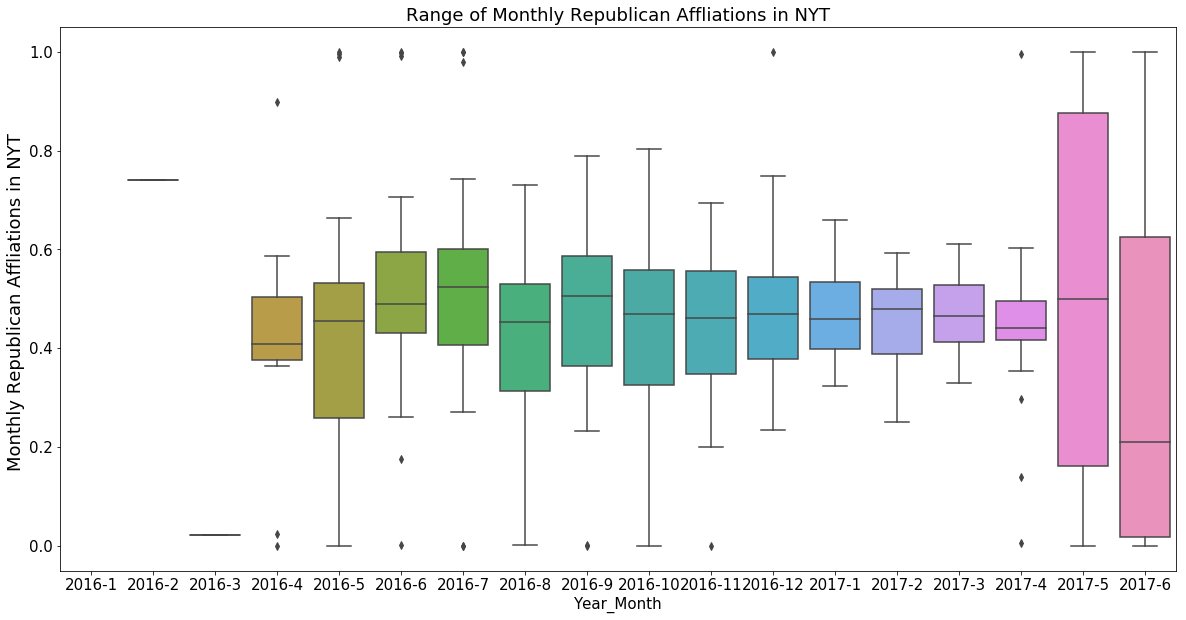

In [85]:
#Bar plot for monthly range of daily Republican affliations
fig = plt.figure(figsize = (20, 10))
plt.figure(figsize = (20, 10))
plt.rcParams.update({'font.size': 15})
NYT_dailymean_df = NYT_df.resample('D').mean()
NYT_dailymean_df['Date'] = NYT_dailymean_df.index.date
NYT_dailymean_df['Year'] = NYT_dailymean_df.index.year
NYT_dailymean_df['Month'] = NYT_dailymean_df.index.month
NYT_dailymean_df['Day'] = NYT_dailymean_df.index.day
NYT_dailymean_df['Weekday']= NYT_dailymean_df.index.weekday_name
NYT_dailymean_df['Year_Month']= df['var3'] = NYT_dailymean_df.Year.astype(str) + '-'+ NYT_dailymean_df.Month.astype(str)  
NYT_dailymean_df['republican_affliation'] = NYT_dailymean_df['republican_affliation']
NYT_dailymean_df.tail()
ax = plt.figure(figsize=(20,10))
sns.boxplot(data=NYT_dailymean_df.loc['2016-01':'2017-08'], x='Year_Month', y='republican_affliation');
#ax.set_title('tt')
plt.title('Range of Monthly Republican Affliations in NYT' , fontsize =18)
#plt.xlabel('Time', fontsize=18)
plt.ylabel('Monthly Republican Affliations in NYT ', fontsize=18)

